# Introduction

## Functions
A Function is a mapping between and input set and an output set. An element of the output set is related to exactly one element of the output set for example f(x) = x2

## Domain and range of a function
A domain is the set of input values that independent variables can validly assume. The range is the output set

## Rate of Change

## Limits

## Differentiation and Derivatives

## Critical Points

## Partial Derivatives

## Integration

## Differential Calculus
This is the study of continuous change. It has two subfields namely differential calculus which studies the rate of change of functions and integral calculus which studies the area under the curve. Differential calculus is the core of Deep Learning

## Vector Calculus

## References
- Python math chapter 7
- Hands-on ML

In [1]:
# Calculus from python math chapter 7
# find a limit
from sympy import Limit, Symbol, S

x = Symbol('x')
limit = Limit(1/x, x, S.Infinity).doit()
print(limit)

0


In [2]:
# Specify direction of limit
limit_direction = Limit(1/x, x, 0, dir='-').doit()

# negative
limit_direction_positive = Limit(1/x, x, 0, dir='+').doit()
print(limit_direction)
print(limit_direction_positive)

-oo
oo


In [3]:
# Indeterminate limit example
from sympy import sin

i_limit = Limit(sin(x)/x, x, 0).doit()
print(i_limit)

1


In [4]:
# Continuous compound interest
n = Symbol('n')
p = Symbol('p', positive=True)
r = Symbol('r', positive=True)
t = Symbol('t', positive=True)
c_interest = Limit(p*(1+r/n)**(n*t), n, S.Infinity).doit()
print(c_interest)

p*exp(r*t)


In [5]:
# Instantaneous rate of change
t = Symbol('t')
St = 5*t**2 + 2*t + 8
t1 = Symbol('t1')
delta_t = Symbol('delta_t')
St1 = St.subs({t: t1})
St1_delta = St.subs({t: t1 + delta_t})
ins_rate = Limit((St1_delta-St1)/delta_t, delta_t, 0).doit()
print(ins_rate)

10*t1 + 2


In [6]:
# Finding derivative of a complicated arbitrary function
from sympy import Derivative

x = Symbol('x')
f = (x**3 + x**2 + x)*(x**2+x)
derv = Derivative(f, x).doit()
print(derv)

(2*x + 1)*(x**3 + x**2 + x) + (x**2 + x)*(3*x**2 + 2*x + 1)


In [7]:
# Calculate derivative
from sympy import sympify, pprint
from sympy.core.sympify import  SympifyError

def derivative(f, var):
    var = Symbol(var)
    d = Derivative(f, var).doit()
    pprint(d)

if __name__ == '__main__':
    f = input('Enter a function: ') # 2*x**2 + 3*x + 1
    var = input('Enter the variable to differentiate with respect to: ') # 4.x + 3
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid input')
    else:
        derivative(f, var)

Invalid input


In [8]:
# Use gradient ascent to find the angle at which a projectile has a max range
import math
from sympy import Derivative, Symbol, sin
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

def find_max_theta(R, theta):
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max

if __name__ == '__main__':
    g = 9.8
    # asume initial velocity
    u = 25
    # expression for range
    theta = Symbol('theta')
    R = u**2*sin(2*theta)/g
    theta_max = find_max_theta(R, theta)
    print('Theta: {0}'.format(math.degrees(theta_max)))
    print('Maximum Range: {0}'.format(R.subs({theta:theta_max})))

Theta: 44.997815081691805
Maximum Range: 63.7755100185965


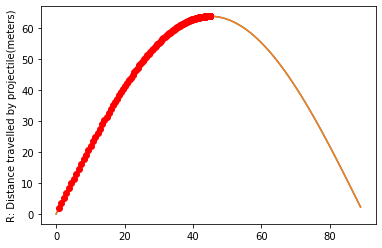

Theta: 44.997815081691805, Max. Range: 57.1394215709871


In [7]:
# Find the angle at maximum range or projectile
import math
import matplotlib.pyplot as plt
from sympy import Derivative, Symbol, sin, cos, solve

def plot_range_theta(u):
    g = 9.8
    angles = range(0, 90, 1)
    R = [u**2*math.sin(math.radians(2*angle))/g for angle in angles]
    plt.plot(angles, R)
    # use LaTex for x-axis label
    plt.plot(angles, R)
    plt.ylabel('R: Distance travelled by projectile(meters)')

def grad_ascent(x0, f1x):
    theta = Symbol('theta')
    epsilon = 1e-6
    step_size  = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({theta:x_old}).evalf()

    X = []
    while abs(x_old - x_new) > epsilon:
        X.append(x_new)
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({theta:x_old}).evalf()
    return x_new, X

def find_max_theta(R, theta):
    # calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max, X = grad_ascent(0.001, R1theta)
    return math.degrees(theta_max.evalf()), X

if __name__ == '__main__':
    g = 9.8
    # assume initial velicity
    u = 25
    plot_range_theta(u)
    theta = Symbol('theta')

    # Expression for range
    R = u**2*sin(2*theta)/g
    theta_max, X = find_max_theta(R, theta)

    # Calculate R for all theta's traversed
    Y = [u**2*math.sin(2*angle)/g for angle in X]
    X = [math.degrees(angle) for angle in X]
    plt.plot(X, Y, 'ro')
    plt.show()
    print('Theta: {0}, Max. Range: {1}'.format(theta_max, R.subs({theta:theta_max})))

In [ ]:
# Generic program for gradient ascent
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

if __name__ == '__main__':
    f = input('Enter a function in one variable') # 25*25*sin(2*theta)/9.8
    var = input('Enter the variable to differentiat with respect to') # theta
    var0 = float(input('Enter the initial value of the variable')) # 0.001
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var)
        print('{0}: {1}'.format(var.name, var_max))
        print('Maximum value: {0}'.format(f.subs({var:var_max})))
    

In [26]:
""" 
Use gradient ascent to find the maximum value of a single-variable
function. This also checks for the existence of a solution
for the equation f'(x)=0
"""
from sympy import Derivative, Symbol, sympify, solve
def grad_ascent(x0, f1x, x):
    # check if f1x=0 has a solution
    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not ext'.format(f1x))
        return
    epsilon = 1e-6
    setp_size = 1e-4
    x_old = x0
    x_new = x_old + setp_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + setp_size*f1x.subs({x:x_old}).evalf()
    return x_new


if __name__ == '__main__':
    f = input('Enter a function in one variable: ') # log(x)
    var = input('Enter the variable to differentiate with respect to: ') # x
    var0 = float(input('Enter the initial value of the variable: ')) # 0.1
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var)
        if var_max:
            print('{0}: {1}'.format(f.subs({var:var_max})))


Cannot continue, solution for 1/x=0 does not ext
